In [8]:
from dask.distributed import Client

In [9]:
client = Client('127.0.0.1:40569')

In [12]:
client

Client Scheduler: tcp://127.0.0.1:40569 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 541.50 GB


distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client


### Using Xarray and net Files

In [1]:
import cartopy
import cmocean
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.colorbar
import xarray as xr
# import dask.array as da
import numpy

In [2]:
%%time

#

#chunk along dim = 'time'
OM4p25 = xr.open_mfdataset('/work/Nkeh.Boh/SST/OM4p25_netcdf/*.nc')
OM4p5 = xr.open_mfdataset('/work/Nkeh.Boh/SST/OM4p5_netcdf/*.nc')
# OM4p25z = xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p25z/comp/*.nc')
# OM4p5nep = xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5nep/comp/*.nc')
# OM4p5mle =xr.open_mfdataset('/work/Nkeh.Boh/SST/NetOMfiles/OM4p5mle/comp/*.nc')

W25 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/W25/comp/WOA05_ptemp_salt_monthly.v20141007.nc')
W5 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/W05/comp/WOA05_ptemp_salt_monthly.v2015.12.03.nc')
#Grid files
G25 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/G25/ocean_hgrid.nc')
G5 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/G5/ocean_hgrid.nc')
M25 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/M25/ocean_mask.nc')
M5 = xr.open_dataset('/work/Nkeh.Boh/SST/NetOMfiles/M5/ocean_mask.nc')

#Read more than 980GB data


#
OM4p25_av = OM4p25['thetao'][:,0].mean(dim='time').load()
OM4p5_av = OM4p5['thetao'][:,0].mean(dim='time').load()
# OM4p5nep_av = OM4p5nep['tos'].chunk({'time':1}).mean(dim='time')#.load()
# OM4p25z_av = OM4p25z['tos'].chunk({'time':1}).mean(dim='time')#.load()
# OM4p5mle_av = OM4p5mle['tos'].chunk({'time':1}).mean(dim='time')#.load()

W25_av = W25['ptemp'][:,0].mean(axis=0).load()
W5_av = W5['ptemp'][:,0].mean(axis=0).load()

/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/nbhome/Nkeh.Boh/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 52.3 s, sys: 1min 22s, total: 2min 15s
Wall time: 8min 34s


In [3]:
%%time
def stats(ax, area, anomaly, label):
    area = area.rename({'nx':'longitude','ny':'latitude'}) #relable dims names of area to long and lat

    mn = (anomaly*area).sum()/area.sum(); mn = mn.values
    sd = numpy.sqrt( ((anomaly-mn)**2*area).sum()/area.sum() ); sd = sd.values
    rms = numpy.sqrt( (anomaly**2*area).sum()/area.sum() ); rms = rms.values
    qmn, qmx = anomaly.min(), anomaly.max(); qmn, qmx = qmn.values, qmx.values
    print(label, 'mean =', mn, 'sd =', sd, 'rms =', rms, 'min =', qmn, 'max =', qmx )
    bb = ax.get_position()
    plt.gcf().text(bb.x0,bb.y1+.01,'mean=%.3f'%mn, horizontalalignment='left')
    plt.gcf().text(bb.x1,bb.y1+.01,'rms=%.3f'%rms, horizontalalignment='right')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [4]:
%%time
xq25 = G25['x'][:][::2,::2]
yq25 = G25['y'][:][::2,::2]
a25 = G25['area'][:]; a25 = a25[::2,::2]+a25[1::2,1::2]+a25[1::2,::2]+a25[1::2,::2]
m25 = M25['mask'][:]; a25 = a25*m25
xq5 = G5['x'][:][::2,::2]
yq5 = G5['y'][:][::2,::2]
a5 = G5['area'][:]; a5 = a5[::2,::2]+a5[1::2,1::2]+a5[1::2,::2]+a5[1::2,::2]
m5 = M5['mask'][:]; a5 = a5*m5

CPU times: user 747 ms, sys: 135 ms, total: 882 ms
Wall time: 1.36 s


In [6]:
%%time

OM4p25_av = OM4p25_av.rename({'yh':'latitude','xh':'longitude'})  # relable dimensions names to 
OM4p25_av['latitude'], OM4p25_av['longitude'] = W25['latitude'], W25['longitude']

# OM4p5nep_av = OM4p5nep_av.rename({'yh':'latitude','xh':'longitude'})
# OM4p5nep_av['latitude'], OM4p5nep_av['longitude'] = W5_av['latitude'],W5_av['longitude']

# OM4p25z_av = OM4p25z_av.rename({'yh':'latitude','xh':'longitude'})
# OM4p25z_av['latitude'], OM4p25z_av['longitude'] = W25_av['latitude'],W25_av['longitude']

OM4p5_av = OM4p5_av.rename({'yh':'latitude','xh':'longitude'})
OM4p5_av['latitude'], OM4p5_av['longitude'] = W5_av['latitude'], W5_av['longitude']

# OM4p5mle_av = OM4p5mle_av.rename({'yh':'latitude','xh':'longitude'})
# OM4p5mle_av['latitude'], OM4p5mle_av['longitude'] = W5_av['latitude'],W5_av['longitude']

CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 1.35 ms


OMp25 mean = 0.04894404411374987 sd = 0.5626378425649883 rms = 0.5647626616346221 min = -5.981206893920898 max = 6.261126518249512
OMp5 mean = 0.05569274634347506 sd = 0.6246257699573032 rms = 0.6271036874928007 min = -5.104009628295898 max = 8.872832298278809
CPU times: user 9.65 s, sys: 238 ms, total: 9.88 s
Wall time: 13.7 s


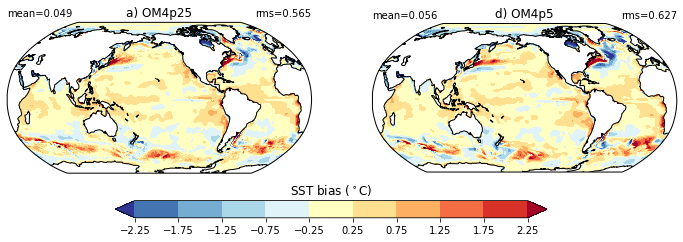

In [7]:
%%time
fig = plt.figure(figsize=(12, 8))
vmin,vmax,ci,cmap = -2.25,2.25,.5,plt.cm.RdYlBu_r
axes = []
cilev = numpy.arange(vmin-ci,vmax+ci*2,ci)
norm = matplotlib.colors.BoundaryNorm(boundaries=cilev, ncolors=cmap.N)

q = OM4p25_av - W25_av
ax = fig.add_subplot(2,2,1,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq25, yq25, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm, vmin=vmin, vmax=vmax)
stats(ax, a25, q, 'OMp25'); 
ax.coastlines()
axes.append(ax)
plt.title('a) OM4p25')

# q  

# q = OM4p5mle_av - W5_av
# ax = fig.add_subplot(2,2,3,projection=cartopy.crs.Robinson(central_longitude=-155))
# im = ax.pcolormesh(xq5, yq5, q,
#               transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
# stats(ax, a5, q, 'OM4p5mle')
# ax.coastlines()
# axes.append(ax)
# plt.title('c) OM4p25e')

q = OM4p5_av - W5_av
ax = fig.add_subplot(2,2,2,projection=cartopy.crs.Robinson(central_longitude=-155))
im = ax.pcolormesh(xq5, yq5, q,
              transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm, vmin=vmin, vmax=vmax)
stats(ax, a5, q, 'OMp5')
ax.coastlines()
axes.append(ax)
plt.title('d) OM4p5')

ax = plt.gcf().add_axes((.25,.5,.5,.03))
cb = matplotlib.colorbar.ColorbarBase(ax=ax, cmap=cmap, norm=norm, boundaries=cilev,
                                      orientation='horizontal', extend='both')
cb.ax.set_title('SST bias ($^\circ$C)')

plt.savefig('sst-bias.png')